In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'ribo.csv'
ribo_df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
ribo_df.head()

,Unnamed: 0,mean_ribo_expr,leiden
0,HCC01T_AAACCTGAGGGCATGT,2.219344,Leiden_5
1,HCC01T_AAACCTGAGTCGCCGT,2.246906,Leiden_3
2,HCC01T_AAACCTGCATTACCTT,1.755100,Leiden_5
3,HCC01T_AAACCTGGTCACACGC,2.281784,Leiden_1
4,HCC01T_AAACCTGTCCAGTATG,2.360475,Leiden_1


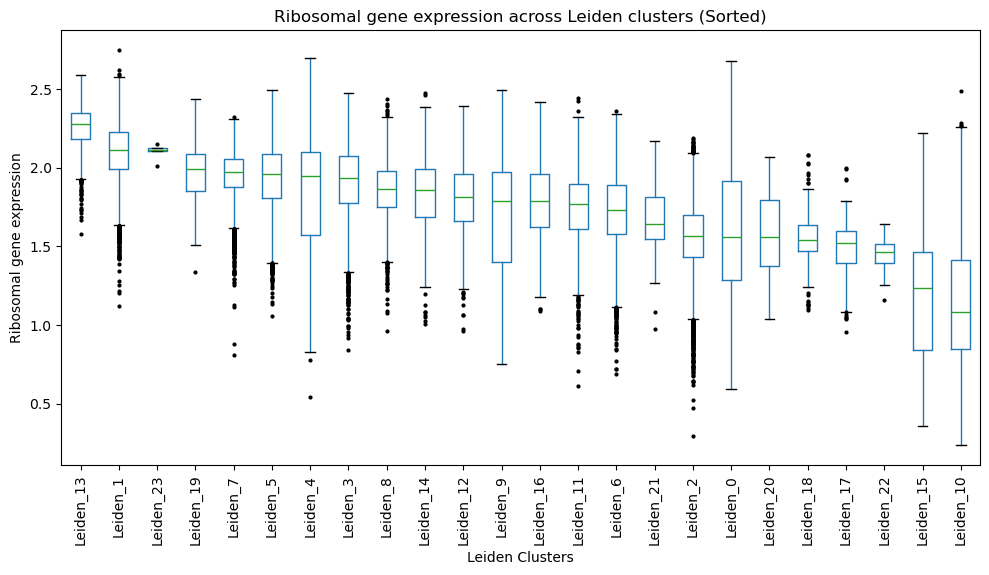

In [2]:
# Group the DataFrame by 'leiden', calculate the median 'mean_mito_expr', and sort by it
sorted_leiden = (
    ribo_df.groupby('leiden')['mean_ribo_expr']
    .median()
    .sort_values(ascending=False)
)

# Sort the original DataFrame based on the sorted 'leiden' order
ribo_df['leiden'] = pd.Categorical(ribo_df['leiden'], categories=sorted_leiden.index, ordered=True)

# Plot the sorted boxplot
# plt.figure(figsize=(12, 6))
ribo_df.boxplot(column='mean_ribo_expr', by='leiden', 
    flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor': 'black'}, 
    grid=False, figsize=(10, 6))
plt.title('Ribosomal gene expression across Leiden clusters (Sorted)')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Leiden Clusters')
plt.ylabel('Ribosomal gene expression')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
